# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | brokopondo
Processing Record 5 of Set 1 | makat
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | san policarpo
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | suntar
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | inhambane
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | saint-marc
Processing Record 21 of Set 1 | knysna
Processing Record 22 of Set 1 | palmares do sul
Processing Record

Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | santa cruz
Processing Record 40 of Set 4 | najran
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | ternate
Processing Record 43 of Set 4 | changji
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | tan an
Processing Record 47 of Set 4 | mehriz
Processing Record 48 of Set 4 | el alto
Processing Record 49 of Set 4 | nampula
Processing Record 0 of Set 5 | kawalu
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | rawson
Processing Record 3 of Set 5 | puerto colombia
Processing Record 4 of Set 5 | kedungwuni
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | chicontepec
Processing Record 7 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 5 | ascension
Processing Record 9 of Set 5 | cap malheureux
Processing Record 10 of Set 5 | parsab

Processing Record 33 of Set 8 | togitsu
Processing Record 34 of Set 8 | bilma
Processing Record 35 of Set 8 | san quintin
Processing Record 36 of Set 8 | jacareacanga
Processing Record 37 of Set 8 | manado
Processing Record 38 of Set 8 | saint-henri-de-levis
City not found. Skipping...
Processing Record 39 of Set 8 | harunabad
Processing Record 40 of Set 8 | breyten
Processing Record 41 of Set 8 | paradwip
City not found. Skipping...
Processing Record 42 of Set 8 | akyab
Processing Record 43 of Set 8 | hihya
Processing Record 44 of Set 8 | csabrendek
Processing Record 45 of Set 8 | arica
Processing Record 46 of Set 8 | pundaguitan
Processing Record 47 of Set 8 | veroli
Processing Record 48 of Set 8 | hundested
Processing Record 49 of Set 8 | port hardy
Processing Record 0 of Set 9 | auki
Processing Record 1 of Set 9 | kilmez
City not found. Skipping...
Processing Record 2 of Set 9 | rio gallegos
Processing Record 3 of Set 9 | mushie
Processing Record 4 of Set 9 | panzhihua
Processing R

Processing Record 16 of Set 12 | durant
Processing Record 17 of Set 12 | guaymas
Processing Record 18 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 19 of Set 12 | ulaanbaatar
Processing Record 20 of Set 12 | severo-yeniseyskiy
Processing Record 21 of Set 12 | natchez
Processing Record 22 of Set 12 | taybad
Processing Record 23 of Set 12 | cabedelo
Processing Record 24 of Set 12 | sabya
Processing Record 25 of Set 12 | le vauclin
Processing Record 26 of Set 12 | dawson creek
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | diffa
Processing Record 29 of Set 12 | bar harbor
Processing Record 30 of Set 12 | raudeberg
Processing Record 31 of Set 12 | rodrigues alves
Processing Record 32 of Set 12 | winston-salem
Processing Record 33 of Set 12 | luanda
Processing Record 34 of Set 12 | xinyu
Processing Record 35 of Set 12 | manggar
Processing Record 36 of Set 12 | hendek
Processing Record 37 of Set 12 | catuday
Processing Record 38 of Set 12 | al

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mareeba,-17.0000,145.4333,25.40,95,8,1.97,AU,1680081316
1,leningradskiy,69.3833,178.4167,-12.38,80,85,3.33,RU,1680081316
2,barrow,71.2906,-156.7887,-10.99,79,100,7.20,US,1680081316
3,sayansk,54.1088,102.1648,9.93,71,97,2.08,RU,1680081317
4,victoria point,-27.5833,153.3000,25.06,88,100,3.52,AU,1680081317


In [29]:
# Export the City_Data into a csv
# city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mareeba,-17.0000,145.4333,25.40,95,8,1.97,AU,1680081316
1,leningradskiy,69.3833,178.4167,-12.38,80,85,3.33,RU,1680081316
2,barrow,71.2906,-156.7887,-10.99,79,100,7.20,US,1680081316
3,sayansk,54.1088,102.1648,9.93,71,97,2.08,RU,1680081317
4,victoria point,-27.5833,153.3000,25.06,88,100,3.52,AU,1680081317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

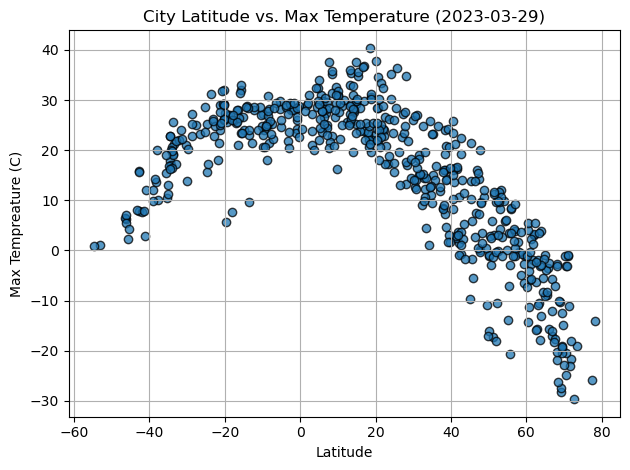

In [79]:
# Build scatter plot for latitude vs. temperature

x_data_lat = city_data_df["Lat"]
y_data_temp = city_data_df["Max Temp"]
norm_date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({norm_date})")
plt.scatter(x_data_lat, y_data_temp,edgecolors = "black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Tempreature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

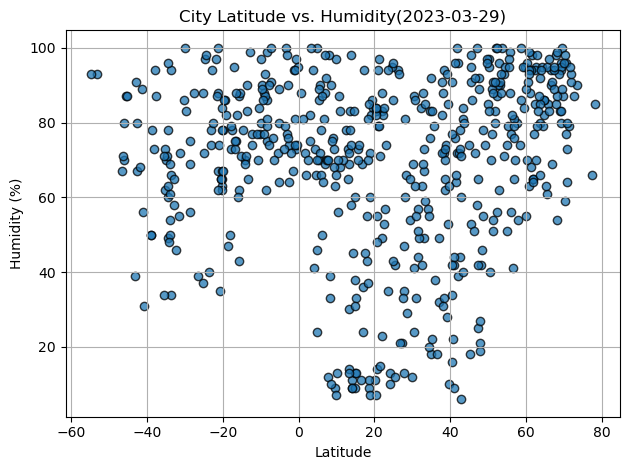

In [73]:
# Build the scatter plots for latitude vs. humidity
x_data_lat = city_data_df["Lat"]
y_data_hum = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity({norm_date})")
plt.scatter(x_data_lat, y_data_hum,edgecolors = "black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

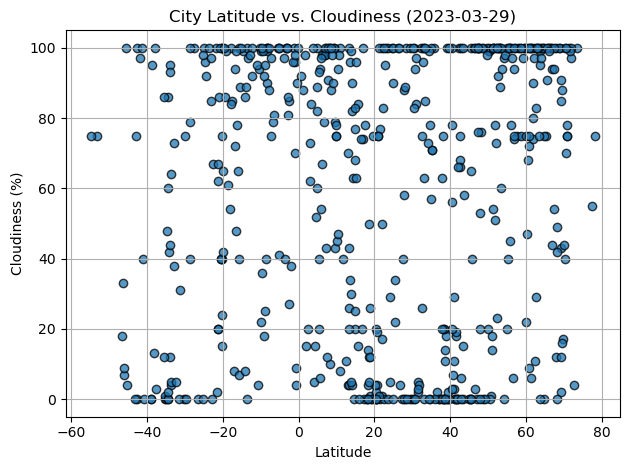

In [80]:
# Build the scatter plots for latitude vs. cloudiness
x_data_lat = city_data_df["Lat"]
y_data_cloud = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({norm_date})")
plt.scatter(x_data_lat, y_data_cloud,edgecolors = "black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

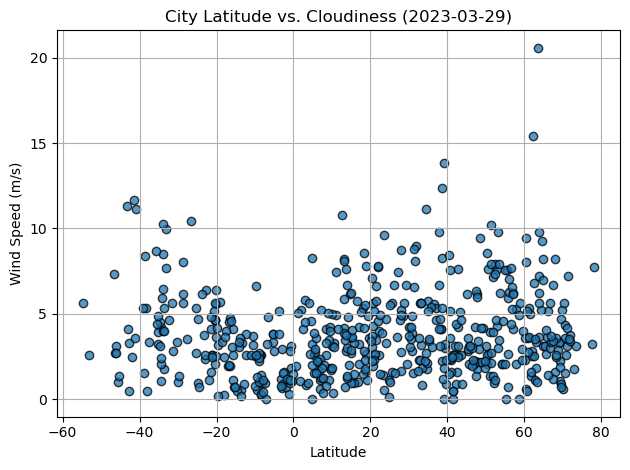

In [77]:
# Build the scatter plots for latitude vs. wind speed
x_data_lat = city_data_df["Lat"]
y_data_winds = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({norm_date})")
plt.scatter(x_data_lat, y_data_winds,edgecolors = "black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regress(x_value, y_value):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    return(slope, intercept, rvalue, pvalue, stderr)

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,leningradskiy,69.3833,178.4167,-12.38,80,85,3.33,RU,1680081316
2,barrow,71.2906,-156.7887,-10.99,79,100,7.20,US,1680081316
3,sayansk,54.1088,102.1648,9.93,71,97,2.08,RU,1680081317
5,hovd,48.0056,91.6419,9.76,19,53,2.16,MN,1680081318
6,machalpur,24.1333,76.3000,35.16,13,29,3.31,IN,1680081146


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mareeba,-17.0000,145.4333,25.40,95,8,1.97,AU,1680081316
4,victoria point,-27.5833,153.3000,25.06,88,100,3.52,AU,1680081317
9,faanui,-16.4833,-151.7500,27.92,75,48,4.75,PF,1680081319
10,punta arenas,-53.1500,-70.9167,1.06,93,75,2.57,CL,1680081137
15,rikitea,-23.1203,-134.9692,26.20,78,85,2.36,PF,1680081322


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8874118856892377


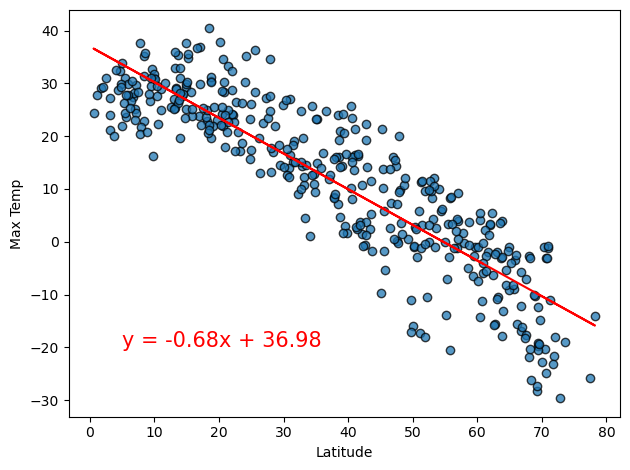

In [20]:
# Linear regression on Northern Hemisphere
x_data_lat = northern_hemi_df["Lat"]
y_data_temp = northern_hemi_df["Max Temp"]

regress_data = linear_regress(x_data_lat,y_data_temp)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_temp, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()


The r-value is: 0.7219430659527792


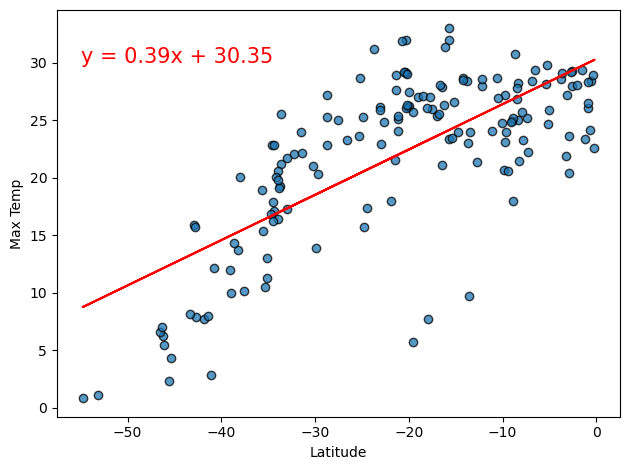

In [22]:
# Linear regression on Southern Hemisphere
x_data_lat = southern_hemi_df["Lat"]
y_data_temp = southern_hemi_df["Max Temp"]

regress_data = linear_regress(x_data_lat,y_data_temp)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")
plt.scatter(x_data_lat, y_data_temp,  edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()

 **Discussion about the linear relationship:** 

Based on the data summary from the both the Northern and Southern Hemispheres, it can be observed that there is a strong correlation between the distance from the equator and the increase in temperature i.e. the further from the equator the lower the max temperature/the closer to the equator the higher the max temperature. The Northern hemisphere data has strong negative linear correlation, and the Southern hemisphere has a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34127148545661057


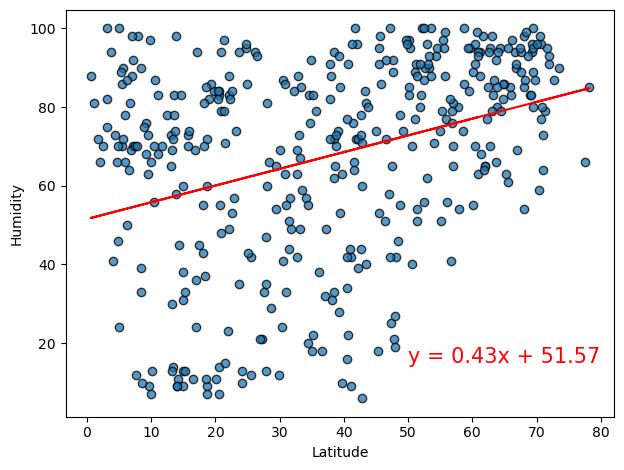

In [24]:
# Northern Hemisphere
x_data_lat = northern_hemi_df["Lat"]
y_data_hum = northern_hemi_df["Humidity"]

regress_data = linear_regress(x_data_lat,y_data_hum)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_hum, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.27712499188272527


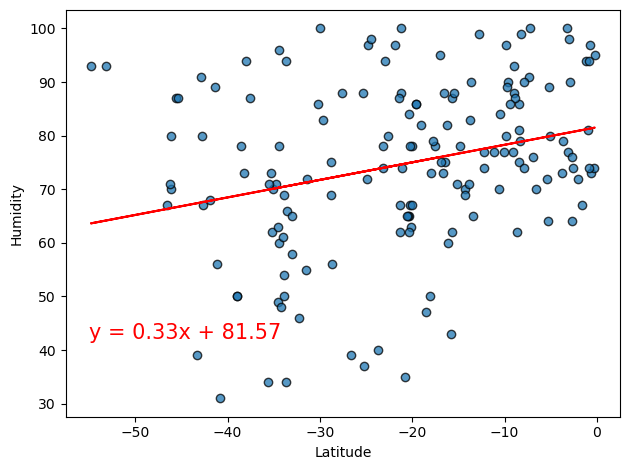

In [25]:
# Southern Hemisphere
x_data_lat = southern_hemi_df["Lat"]
y_data_hum = southern_hemi_df["Humidity"]

regress_data = linear_regress(x_data_lat,y_data_hum)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_hum, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,42),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**

Based on the data summary from the both the Northern and Southern Hemispheres, it can be observed that there is a weak or very weak correlation between the distance from the equator and the percentage of humidity at the various cities i.e. the distance from the equator has no material impact on humidity. The Northern hemisphere data has weak positive linear correlation, and the Southern hemisphere has a very weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16249532332265273


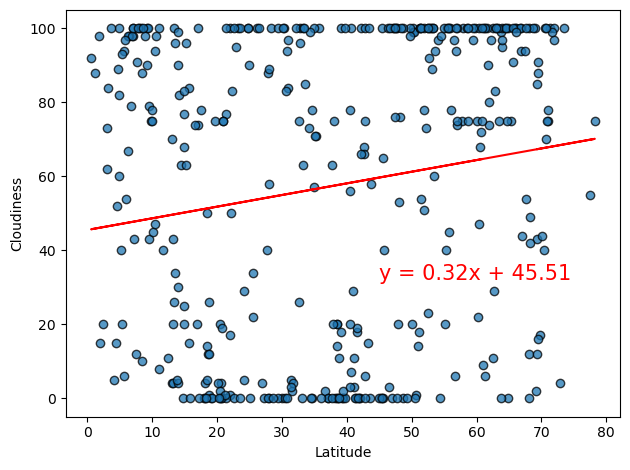

In [26]:
# Northern Hemisphere
x_data_lat = northern_hemi_df["Lat"]
y_data_cloud = northern_hemi_df["Cloudiness"]

regress_data = linear_regress(x_data_lat,y_data_cloud)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_cloud, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45,32),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.37481625384973494


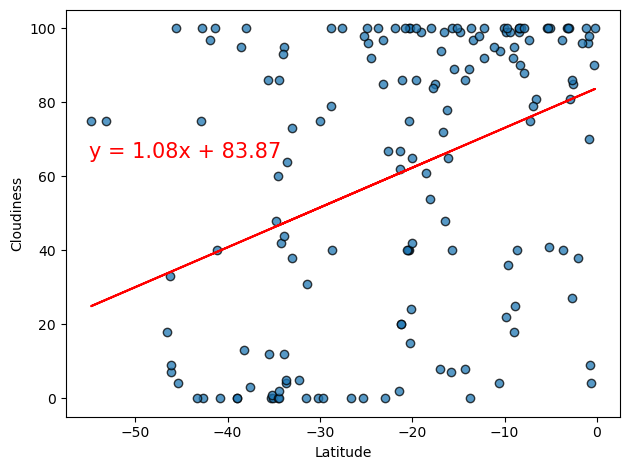

In [27]:
# Southern Hemisphere
x_data_lat = southern_hemi_df["Lat"]
y_data_cloud = southern_hemi_df["Cloudiness"]

regress_data = linear_regress(x_data_lat,y_data_cloud)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_cloud, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**

Based on the data summary from the both the Northern and Southern Hemispheres, it can  be observed that there is a weak or very weak correlation between the distance from the equator and the level of cloudiness at the various cities i.e. the distance from the equator has no material impact on the level of cloud cover. The Northern hemisphere data has a very weak positive linear correlation, and the Southern hemisphere has a weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10678026171407679


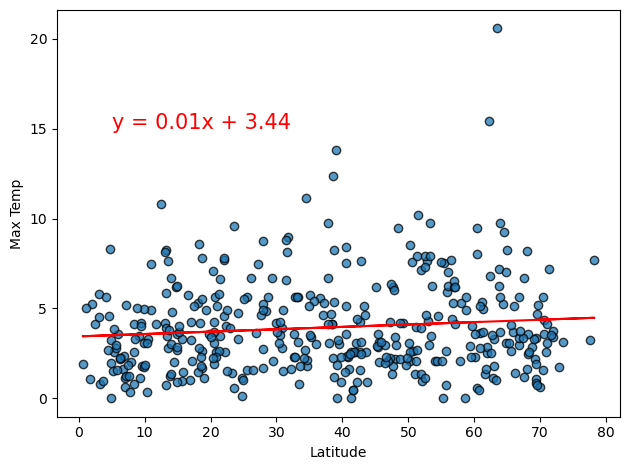

In [28]:
# Northern Hemisphere
x_data_lat = northern_hemi_df["Lat"]
y_data_winds = northern_hemi_df["Wind Speed"]

regress_data = linear_regress(x_data_lat,y_data_winds)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_winds, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()


The r-value is: -0.4315782510312485


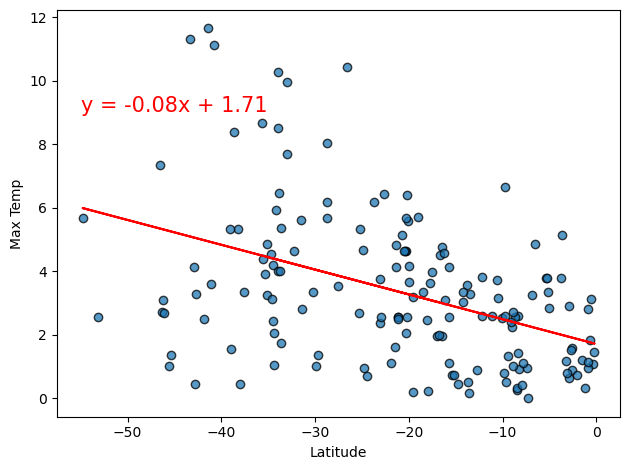

In [29]:
# Southern Hemisphere
x_data_lat = southern_hemi_df["Lat"]
y_data_winds = southern_hemi_df["Wind Speed"]

regress_data = linear_regress(x_data_lat,y_data_winds)
regress_values = x_data_lat * regress_data[0] + regress_data[1]
line_eq = "y = " + str(round(regress_data[0],2)) + "x + " + str(round(regress_data[1],2))

print(f"The r-value is: {regress_data[2]}")

# Incorporate the other graph properties
plt.scatter(x_data_lat, y_data_winds, edgecolors = "black", alpha = 0.75)
plt.plot(x_data_lat, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-55,9),fontsize=15,color="red")

# # Show plot
plt.tight_layout()
plt.show()


**Discussion about the linear relationship:** 

Based on the data summary from the both the Northern and Southern Hemispheres, it can be observed that there is a weak or very weak correlation between the distance from the equator and the wind speed as measured at the various cities i.e. the distance from the equator has no material impact on the wind speed. The Northern hemisphere data has a very weak positive linear correlation, and the Southern hemisphere has a weak positive correlation.